In [14]:
!pip install pandas
!pip install numpy
!pip install -U ipykernel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd


In [15]:
!which python


/Users/alukas/miniconda3/bin/python


In [16]:
# check if .npz files loaded correctly
for data_name in ["toy", "mnist", "spam"]: 
    data = np.load(f"../hw1/data/{data_name}-data.npz")
    print(f"\nLoaded {data_name} data!")
    for field in ["training_data", "training_labels", "test_data"]:
        print(f"{field}: {data[field].shape}")



Loaded toy data!
training_data: (1000, 2)
training_labels: (1000,)
test_data: (0,)

Loaded mnist data!
training_data: (60000, 1, 28, 28)
training_labels: (60000,)
test_data: (10000, 1, 28, 28)

Loaded spam data!
training_data: (4171, 46)
training_labels: (4171,)
test_data: (1000, 46)


2e_Theory of Hard-Margin Support Vector Machines

In [17]:
# Plot the data points
def plot_data_points(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels)

# Plot the decision boundary
def plot_decision_boundary(w, b):
    x = np.linspace(-5, 5, 100)
    y = -(w[0] * x + b) / w[1]
    plt.plot(x, y, 'k')

# plot the margins
def plot_margins(w, b):
    ##TODO
    #margin distance between decision boundary line and the closest data point, usually maximized via the dual optimization
    x = np.linspace(-5, 5, 100)

    #lower -1 margin
    lower_val_y = -(w[0] * x + (b+1)) / w[1]

    #upper +1 margin (wx + aplha = 1)
    upper_val_y = -(w[0] * x + (b-1)) / w[1]


    #plotting the upper and lower margin 
    plt.plot(x, upper_val_y, 'r--', label = "upper margin") # make red
    plt.plot(x, lower_val_y, 'b--', label = "lower margin") # make blue 

# identifying the support vectors from attribute of the model 
def plot_SVs(model):
    SVs = model.support_vectors_
    plt.scatter(SVs[:, 0], SVs[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
    # facecolors = none makes clear (transparent)
    # s=100, makes big circles 
    # edgecolors='k', makes markers edge color black 
    # these are all params that make support vectors identifable
    

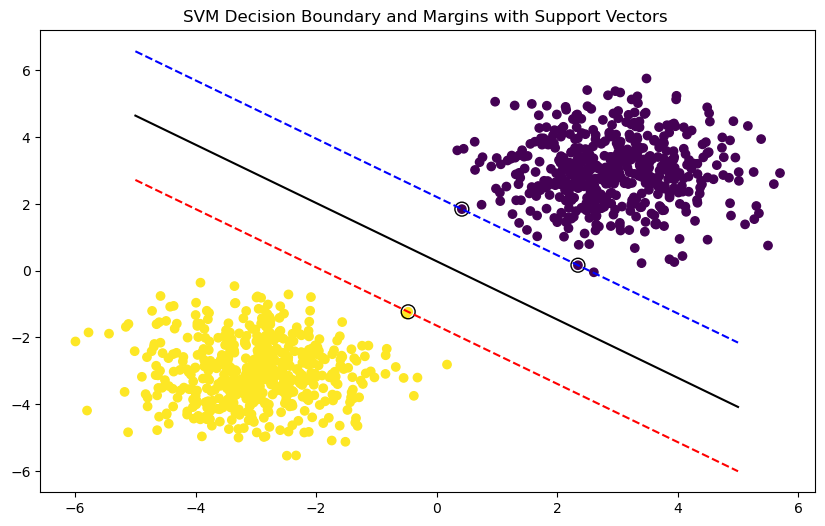

In [18]:
# loading the toy data from hw1 folder
data = np.load("../hw1/data/toy-data.npz")
X_train = data["training_data"]
y_train = data["training_labels"]

# training SVM, model is SVC() 
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# grabbing the model params 
w = model.coef_[0]
b = model.intercept_[0]

# plotting everything 
plt.figure(figsize=(10,6))
plot_data_points(X_train, y_train)
plot_decision_boundary(w, b)
plot_margins(w, b)
plot_SVs(model)
plt.title("SVM Decision Boundary and Margins with Support Vectors ")
plt.show()

3a_Data Partitioning 
TODO: reshuffle the data 

In [19]:
np.random.seed(53)

### SHUFFLE and PARTITION MNIST dataset 10,000 training images in validation set (dont include into training)
og_data = np.load("../hw1/data/mnist-data.npz")

## randomly permute index of features (num of rows)
index = np.random.permutation(len(og_data["training_data"]))
mnist_data = og_data["training_data"][index]
# now to flatten (bc 28x28 size of image)
mnist_data = mnist_data.reshape(mnist_data.shape[0], -1) # (60000, 28*28)
# ensure corresponding labels shuffled properly
mnist_label = og_data["training_labels"][index]

# assign the training data and labels 
mnist_train_data = mnist_data[10000:]
mnist_train_label = mnist_label[10000:]
#print(mnist_train_data[100])
print(mnist_train_data)
mnist_valid_data = mnist_data[:10000]
mnist_valid_label = mnist_label[:10000]
print(mnist_train_label)
print(mnist_train_data)

### SHUFFLE AND PARTITION SPAM dataset 20% in validation set (not included into traiing)
s_data = np.load("../hw1/data/spam-data.npz")
## randomly permute index of feature 
index_shuff = np.random.permutation(len(s_data["training_data"]))
spam_data = s_data["training_data"][index_shuff]
spam_data = spam_data.reshape(spam_data.shape[0], -1)
spam_label = s_data["training_labels"][index_shuff]

# calc validation index 20% of data points 
valid_num = int(0.20 * (s_data["training_data"].shape[0]) ) # first 20% of this dataset
spam_valid_data = spam_data[:valid_num] # take first 20% of the data 
spam_valid_label = spam_label[:valid_num] 

# assign the training data and labels 
spam_train_data = spam_data[valid_num:]
spam_train_label = spam_label[valid_num:]

print(f"Validation data shape: {mnist_valid_data.shape}")
print(f"Validation labels shape: {mnist_valid_label.shape}")



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[7 5 0 ... 3 8 0]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Validation data shape: (10000, 784)
Validation labels shape: (10000,)


3b_Evaluation Metric 

In [20]:
# write a func: 
# input: set of true labels (y), set of predicted labels (y_hat)
# output: computes classification accuracy score 
def classification_accuracy(y, y_hat): 
    retval = 0 
    y = np.array(y)
    y_hat = np.array(y_hat)

    retval = np.sum(y == y_hat)
    return (retval / len(y))

    # for i in range(len(y_hat)):
    #     if y[i] == y_hat[i]:
    #         curr_sum += 1
    # curr_sum = curr_sum/ len(y_hat)
    # return curr_sum



4_Support Vector Machines: Coding

Training examples: 100
 Training Accuracy: 1.0000
 Validation Accuracy: 0.7300
Training examples: 200
 Training Accuracy: 1.0000
 Validation Accuracy: 0.7650
Training examples: 500
 Training Accuracy: 1.0000
 Validation Accuracy: 0.8400
Training examples: 1000
 Training Accuracy: 1.0000
 Validation Accuracy: 0.8540
Training examples: 2000
 Training Accuracy: 1.0000
 Validation Accuracy: 0.8945
Training examples: 5000
 Training Accuracy: 1.0000
 Validation Accuracy: 0.9008
Training examples: 10000
 Training Accuracy: 1.0000
 Validation Accuracy: 0.9056


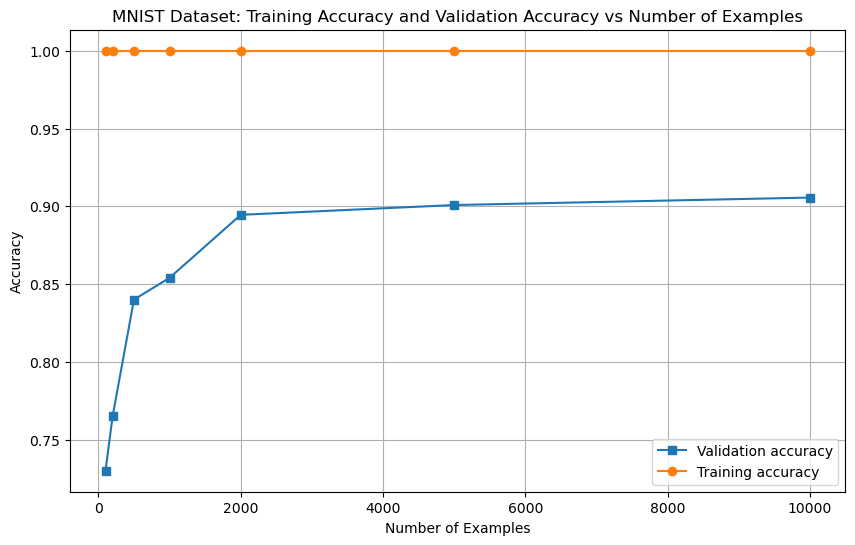

In [22]:
def classification_accuracy(y, y_hat): 
    retval = 0 
    y = np.array(y)
    y_hat = np.array(y_hat)

    retval = np.sum(y == y_hat)
    return (retval / len(y))

train_examples = [100, 200, 500, 1000, 2000, 5000, 10000]
train_accuracies = []
validation_accuracies = []

for num in train_examples:
    # check class distribution, ensure balanced
    unique_classes = np.unique(mnist_train_label[:num])
    if len(unique_classes) < 2:
        print(f"Skipping num={num} as only one class is present: {unique_classes}")
        continue 

    # train the SVC model
    model = SVC(kernel='linear')
    model.fit(mnist_train_data[:num], mnist_train_label[:num]) # fit to data thats been flatenned + use :num examples 

    #predict on the training set 
    train_preds = model.predict(mnist_train_data[:num])
    valid_preds = model.predict(mnist_valid_data[:num])

    #based on preds by model, evaluate model performace classifcation_accuracy
    train_accuracy = classification_accuracy(mnist_train_label[:num], train_preds) # params: true y, predicted y  
    train_accuracies.append(train_accuracy)
    
    validation_accuracy = classification_accuracy(mnist_valid_label[:num], valid_preds)
    validation_accuracies.append(validation_accuracy)

    print(f"Training examples: {num}")
    print(f" Training Accuracy: {train_accuracy:.4f}")
    print(f" Validation Accuracy: {validation_accuracy:.4f}")

# plot the accuracy of training and validation vs # of training examples used to train my classifier 
plt.figure(figsize=(10, 6))
plt.plot(train_examples, validation_accuracies, label="Validation accuracy", marker='s')
plt.plot(train_examples, train_accuracies, label="Training accuracy", marker='o')

plt.title("MNIST Dataset: Training Accuracy and Validation Accuracy vs Number of Examples")
plt.xlabel("Number of Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

Training examples: 100
  Training Accuracy: 0.9600
  Validation Accuracy: 0.7900
Training examples: 200
  Training Accuracy: 0.9150
  Validation Accuracy: 0.7800
Training examples: 500
  Training Accuracy: 0.8680
  Validation Accuracy: 0.8220
Training examples: 1000
  Training Accuracy: 0.8820
  Validation Accuracy: 0.8285
Training examples: 2000
  Training Accuracy: 0.8585
  Validation Accuracy: 0.8381
Training examples: 4171
  Training Accuracy: 0.8592
  Validation Accuracy: 0.8345
4171


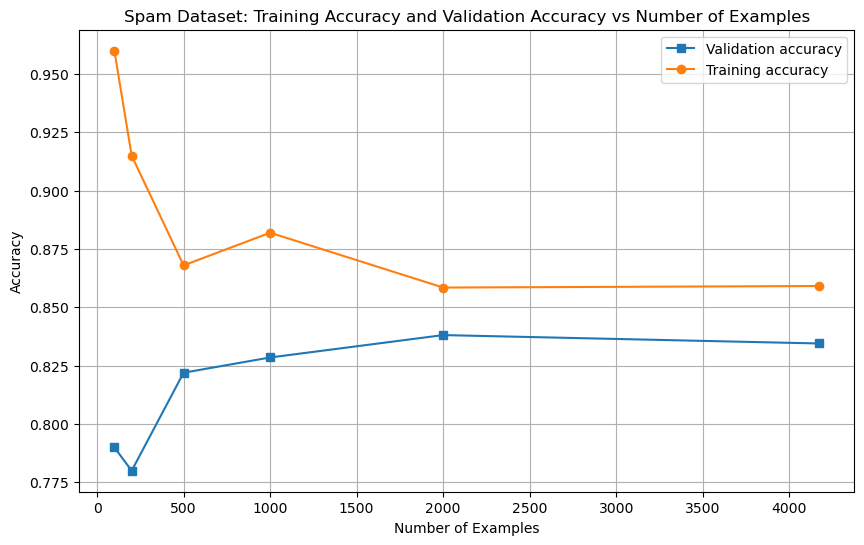

In [24]:
def classification_accuracy(y, y_hat): 
    retval = 0 
    y = np.array(y)
    y_hat = np.array(y_hat)

    retval = np.sum(y == y_hat)
    return (retval / len(y))


train_examples = [100, 200, 500, 1000, 2000, 4171]
train_accuracies = []
validation_accuracies = []


for num in train_examples:
    # check class distribution, ensure balanced
    unique_classes = np.unique(spam_train_label[:num])
    if len(unique_classes) < 2:
        print(f"Skipping num={num} as only one class is present: {unique_classes}")
        continue 

    # train the SVC model
    model = SVC(kernel='linear')
    model.fit(spam_train_data[:num], spam_train_label[:num]) # fit to data thats been flatenned + use :num examples 

    #predict on the training set 
    train_preds = model.predict(spam_train_data[:num])
    valid_preds = model.predict(spam_valid_data[:num])

    #based on preds by model, evaluate model performace classifcation_accuracy
    train_accuracy = classification_accuracy(spam_train_label[:num], train_preds) # params: true y, predicted y  
    train_accuracies.append(train_accuracy)
    
    validation_accuracy = classification_accuracy(spam_valid_label[:num], valid_preds)
    validation_accuracies.append(validation_accuracy)

    print(f"Training examples: {num}")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Validation Accuracy: {validation_accuracy:.4f}")

# plot the accuracy of training and validation vs # of training examples used to train my classifier 
plt.figure(figsize=(10, 6))
plt.plot(train_examples, validation_accuracies, label="Validation accuracy", marker='s')
plt.plot(train_examples, train_accuracies, label="Training accuracy", marker='o')

plt.title("Spam Dataset: Training Accuracy and Validation Accuracy vs Number of Examples")
plt.xlabel("Number of Examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
print(spam_data.shape[0])

5_Hyperparameter Tuning 

In [33]:
from sklearn.svm import LinearSVC
def classification_accuracy(y, y_hat): 
    retval = 0 
    y = np.array(y)
    y_hat = np.array(y_hat)

    retval = np.sum(y == y_hat)
    return (retval / len(y))

# Hyperparameter C pass into the model SVC 
# Train a model for each value of C
# Evaluate performance (classification accuracy) choose the highest accuracy

# Prepare MNIST dataset 
mnist_train_data = mnist_data[:10000]
mnist_train_label= mnist_label[:10000]

mnist_valid_data = mnist_data[10000:]
print(mnist_test.shape)
mnist_valid_label = mnist_label[10000:]
print(f"Validation data shape: {mnist_train_data.shape}")
print(f"Validation labels shape: {mnist_valid_label.shape}")

# Iterate different values of C I'm using 
C_vals = [.01, .1, 1, 10, 50, 100, 1000, 10000]
#C_vals = [0.1, 10]
accuracies = []
hash_C = {}
best_C = 0

for C in C_vals: 
    model = LinearSVC(C=C, random_state=23)
    model.fit(mnist_train_data, mnist_train_label)

    validation_preds = model.predict(mnist_valid_data)
    accuracy = classification_accuracy(mnist_valid_label, validation_preds)

    hash_C[accuracy] = C # map accuracy to the value C hyperparameter
    accuracies.append(accuracy)
    print(f"C={C}, Validation Accuracy={accuracy:.4f}")

print(accuracies)
# highest accuracy
best_accuracy = max(accuracies)
# find the correspoinding C value 
best_C = hash_C[best_accuracy]

print(f"\nBest Validation Accuracy={best_accuracy:.4f} for C={best_C}")

## Train Model with Test Data from MNIST og_data["test_data"]
mnist_test = og_data["test_data"]
mnist_test = mnist_test.reshape(mnist_test.shape[0], -1)
final_model = LinearSVC(C=best_C)
final_model.fit(mnist_data, mnist_label) #mnist_data contains all the training data including validation data

final_preds = final_model.predict(mnist_test)


(10000, 1, 28, 28)
Validation data shape: (10000, 784)
Validation labels shape: (50000,)


/Users/alukas/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C=0.01, Validation Accuracy=0.8548


/Users/alukas/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C=0.1, Validation Accuracy=0.8536


/Users/alukas/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C=1, Validation Accuracy=0.8537


/Users/alukas/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C=10, Validation Accuracy=0.8536


/Users/alukas/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C=50, Validation Accuracy=0.8543


/Users/alukas/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C=100, Validation Accuracy=0.8541


/Users/alukas/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C=1000, Validation Accuracy=0.8542


/Users/alukas/miniconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C=10000, Validation Accuracy=0.8540
[np.float64(0.85484), np.float64(0.8536), np.float64(0.85366), np.float64(0.85364), np.float64(0.85428), np.float64(0.85406), np.float64(0.8542), np.float64(0.854)]

Best Validation Accuracy=0.8548 for C=0.01


6_K Fold Cross Validation 

In [ ]:
def classification_accuracy(y, y_hat): 
    retval = 0 
    y = np.array(y)
    y_hat = np.array(y_hat)

    retval = np.sum(y == y_hat)
    return (retval / len(y))

np.random.seed(5927)
indexs = np.arange(len(spam_data))
# shuffle the indeices in spam_data
np.random.shuffle(indexs)

#training data & labels shuffled, ensure corresponding 
shuffled_train = spam_data[indexs]
shuffled_labels = spam_label[indexs]

# split into 5 folds 
k = 5 
folds = np.array_split(np.arange(len(shuffled_train)), k)
# decide the C values 
C_nums = [1e-4, 1e-2, 1e-1, 1, 20, 50, 100, 1000]
# store the mean accuracies for each C value 
avg_accuracies = []

for C in C_nums: 
    # instatiate a list for fold accuracies 
    fold_accuracies = [] 

    # inner loop to ensure fold 5 times per C value 
    for a_fold in range(k):
        # decide the training & validation split 
        train_indices = np.concatenate([folds[i] for i in range(k) if i != a_fold])# include all folds (k-1) but the i = a_fold
        test_indicies = folds[a_fold]

        Xtrain_data = shuffled_train[train_indices]
        ytrain_data = shuffled_labels[train_indices]

        Xval_data = shuffled_train[test_indicies]
        yval_data = shuffled_labels[test_indicies]

        # training model with current C values 
        model = SVC(kernel='linear', C=C)
        model.fit(Xtrain_data, ytrain_data)
         
        # eval of validation data 
        y_preds = model.predict(Xval_data)
        valid_accuracy = classification_accuracy(yval_data, y_preds)
        fold_accuracies.append(valid_accuracy)

    #now to compute the avg accuracies for each C value 
    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)

    print(f"C = {C}: Average Accuracy = {avg_accuracy:.4f}")

# after doing the 5 fold for each C value, find the best C value 
best_C_ind = np.argmax(avg_accuracies) # argmax - returns the indices of the maximum values along an axis
# result of argmax is the index of the max value
# therefore index into C_values 
best_C = C_vals[best_C_ind]
print(f"Best C Value: {best_C} with Average Accuracy: {avg_accuracies[best_C_ind]:.4f}")

C = 0.0001: Average Accuracy = 0.7183
C = 0.01: Average Accuracy = 0.7749
C = 0.1: Average Accuracy = 0.7948
C = 1: Average Accuracy = 0.8010
C = 20: Average Accuracy = 0.8020
C = 50: Average Accuracy = 0.8020
C = 100: Average Accuracy = 0.8017
C = 1000: Average Accuracy = 0.8017
Best C Value: 50 with Average Accuracy: 0.8020
